v1.1:
- Mest ofte brukte substantiver i vurdering
- Absolutte tall endret til forholdstall 
- Definert y akse på figuren til HVL hypotese 2

In [2]:
import pandas as pd
import re
import spacy
from collections import Counter
from matplotlib import pyplot as plt

# UIS

In [82]:
df = pd.read_excel(r'/Users/Honza/Downloads/undervisning_uis.xlsx')

In [83]:
df = df[df['INFOTYPEKODE']=='ARBFORMER'] # droppe vurderdinger
df = df.reset_index(drop=True)

## Rens

In [84]:
df = df.drop([518, 841,1718, 1719, 2647, 3237]) # 6 rad uten verdi (nan)
df = df.reset_index(drop=True)

In [85]:
df['TxtCln'] = df.apply(lambda x: re.compile(r'<[^>]+>').sub('', x['INFOTEKST']),axis=1) # fjerne HTML
df['TxtCln'] = df['TxtCln'].str.lower() # lower case

## Mest brukte substantiver 

In [66]:
nlp = spacy.load('nb_core_news_sm') # bruke den norske språkmodellen
nlp.max_length = 1500000 #allokere minne

In [70]:
def FinnMestBrukteSubst(serie):
    FullCorpus = ' '.join(serie.tolist())
    doc = nlp(FullCorpus)

    substantiver = [token.text
             for token in doc
             if (not token.is_stop and
                 not token.is_punct and
                 token.pos_ == "NOUN")]

    # 200 mest brukte substantiver
    subst_freq = Counter(substantiver)
    return(subst_freq.most_common(300))

In [56]:
common_subst = FinnMestBrukteSubst(df['TxtCln'])

In [37]:
common_subst

[('forelesninger', 1636),
 ('timer', 1409),
 ('arbeid', 899),
 ('studentene', 843),
 ('veiledning', 756),
 ('uke', 723),
 ('gruppearbeid', 719),
 ('undervisningen', 596),
 ('undervisning', 577),
 ('emnet', 486),
 ('praksis', 484),
 ('seminarer', 476),
 ('studenten', 427),
 ('forelesning', 388),
 ('grupper', 357),
 ('studiet', 333),
 ('selvstudium', 303),
 ('seminar', 293),
 ('studenter', 287),
 ('student', 286),
 ('oppgaver', 270),
 ('samlingene', 255),
 ('arbeidet', 234),
 ('øvinger', 224),
 ('diskusjoner', 222),
 ('oppgaven', 221),
 ('innlevering', 207),
 ('canvas', 202),
 ('uker', 197),
 ('gruppeundervisning', 194),
 ('prosjektarbeid', 192),
 ('refleksjon', 187),
 ('deltakelse', 180),
 ('semester', 168),
 ('ensemble', 162),
 ('pensum', 149),
 ('forelesningene', 148),
 ('gruppe', 146),
 ('samarbeid', 138),
 ('samlinger', 131),
 ('ekskursjoner', 128),
 ('arbeidsformer', 126),
 ('kurset', 126),
 ('presentasjoner', 125),
 ('form', 121),
 ('aktiviteter', 121),
 ('eksamen', 118),
 ('teori

Disse er de substantivene som ble oftest brukt i datasettet.
Ord som virker relevant:
    
- forelesinger, forelesningene
- gruppeoppgaver, grupper, gruppeundervisning, refleksjonsgrupper
- casediskusjoner, case
- prosjekt, prosjektarbeid
- egenøving
- samtale/diskusjon, diskusjon, diskusjoner
- workshops
- seminarene

## Mest brukte substantiver per år

In [86]:
MestBrukteSubstperAar = []

for x in df.ARSTALL_FRA.unique():
    print(x)
    MestBrukteSubstperAar.append(FinnMestBrukteSubst(df[df['ARSTALL_FRA']==x]['TxtCln']))

2020
2021
2019


In [64]:
MestBrukteSubstperAar[2] # mest brukte i 2019

[('forelesninger', 523),
 ('timer', 406),
 ('arbeid', 291),
 ('studentene', 251),
 ('uke', 238),
 ('veiledning', 232),
 ('gruppearbeid', 219),
 ('undervisning', 194),
 ('undervisningen', 189),
 ('seminarer', 159),
 ('praksis', 158),
 ('emnet', 151),
 ('studenten', 132),
 ('forelesning', 127),
 ('grupper', 115),
 ('studiet', 113),
 ('student', 95),
 ('seminar', 93),
 ('studenter', 91),
 ('selvstudium', 89),
 ('oppgaver', 88),
 ('samlingene', 87),
 ('gruppeundervisning', 74),
 ('diskusjoner', 73),
 ('arbeidet', 73),
 ('oppgaven', 70),
 ('øvinger', 69),
 ('uker', 66),
 ('prosjektarbeid', 64),
 ('innlevering', 63),
 ('deltakelse', 60),
 ('refleksjon', 60),
 ('canvas', 59),
 ('ensemble', 58),
 ('semester', 58),
 ('gruppe', 48),
 ('forhold', 48),
 ('dokumentasjon', 47),
 ('samlinger', 46),
 ('kurset', 45),
 ('aktiviteter', 44),
 ('form', 44),
 ('samarbeid', 44),
 ('pensum', 42),
 ('presentasjoner', 41),
 ('konserter', 40),
 ('teori', 40),
 ('arbeidskrav', 40),
 ('ensembler', 39),
 ('eksamen'

In [62]:
MestBrukteSubstperAar[0] # mest brukte i 2020

[('forelesninger', 562),
 ('timer', 469),
 ('arbeid', 303),
 ('studentene', 299),
 ('veiledning', 264),
 ('gruppearbeid', 249),
 ('uke', 247),
 ('undervisningen', 203),
 ('undervisning', 187),
 ('praksis', 175),
 ('emnet', 165),
 ('seminarer', 160),
 ('studenten', 139),
 ('grupper', 129),
 ('forelesning', 129),
 ('studiet', 107),
 ('seminar', 102),
 ('studenter', 100),
 ('selvstudium', 99),
 ('student', 95),
 ('oppgaver', 93),
 ('samlingene', 92),
 ('diskusjoner', 79),
 ('arbeidet', 79),
 ('øvinger', 77),
 ('oppgaven', 73),
 ('canvas', 71),
 ('innlevering', 71),
 ('uker', 68),
 ('prosjektarbeid', 64),
 ('refleksjon', 62),
 ('gruppeundervisning', 61),
 ('deltakelse', 58),
 ('semester', 57),
 ('forelesningene', 57),
 ('ensemble', 53),
 ('pensum', 52),
 ('gruppe', 49),
 ('samlinger', 49),
 ('arbeidsformer', 47),
 ('samarbeid', 45),
 ('presentasjoner', 45),
 ('ekskursjoner', 44),
 ('eksamen', 43),
 ('kurset', 43),
 ('teori', 41),
 ('form', 40),
 ('aktiviteter', 39),
 ('semesteret', 38),
 (

In [63]:
MestBrukteSubstperAar[1] # mest brukte i 2021

[('forelesninger', 550),
 ('timer', 534),
 ('arbeid', 305),
 ('studentene', 293),
 ('veiledning', 260),
 ('gruppearbeid', 251),
 ('uke', 236),
 ('undervisningen', 204),
 ('undervisning', 196),
 ('emnet', 170),
 ('seminarer', 157),
 ('studenten', 156),
 ('praksis', 151),
 ('forelesning', 132),
 ('selvstudium', 116),
 ('studiet', 113),
 ('grupper', 113),
 ('seminar', 100),
 ('student', 96),
 ('studenter', 96),
 ('oppgaver', 89),
 ('arbeidet', 82),
 ('oppgaven', 78),
 ('øvinger', 77),
 ('samlingene', 76),
 ('innlevering', 73),
 ('canvas', 71),
 ('diskusjoner', 70),
 ('refleksjon', 65),
 ('uker', 63),
 ('deltakelse', 62),
 ('gruppeundervisning', 59),
 ('prosjektarbeid', 57),
 ('pensum', 55),
 ('semester', 53),
 ('forelesningene', 53),
 ('ensemble', 51),
 ('gruppe', 49),
 ('samarbeid', 49),
 ('ekskursjoner', 45),
 ('tema', 44),
 ('arbeidsformer', 43),
 ('faget', 42),
 ('veileder', 41),
 ('studier', 40),
 ('kurset', 39),
 ('presentasjoner', 39),
 ('arbeidskrav', 39),
 ('aktiviteter', 38),
 (

Andre substantiver som evt. er relevant:
    
- laboratorieøvelser
- samspillsaktiviteter
- studentpresentasjoner
- refleksjonsnotat
- observasjon
- simulering
- ekskursjoner

## Minste brukbare produkt

In [87]:
# dele datarammen i tre
df2019 = df[df['ARSTALL_FRA']==2019]
df2020 = df[df['ARSTALL_FRA']==2020]
df2021 = df[df['ARSTALL_FRA']==2021]

### Hypotese 1: Ingen tydelig trend i bruk av forelesninger.

In [88]:
len(df2019[df2019['TxtCln'].str.contains("foreles") == True])

713

In [89]:
len(df2020[df2020['TxtCln'].str.contains("foreles") == True])

745

In [90]:
len(df2021[df2021['TxtCln'].str.contains("foreles") == True])

735

Beskrivelsen av arbeidsformer fra 2021 nevner forelesning omtrent like ofte som den fra 2019. Vær obs på at disse tall inkluderer også gjesteforelesninger osv. men denne forskjellen er ikke vesentlig når man ser kun på aktiv/passiv form for undervisning. Hypotesen holder.

### Hypotese 2: Økende bruk av gruppeaktiviteter.

In [101]:
print(len(df2019[df2019['TxtCln'].str.contains("gruppe") == True])/len(df2019)*100, "% in 2019")
print(len(df2020[df2020['TxtCln'].str.contains("gruppe") == True])/len(df2020)*100, "% in 2020")
print(len(df2021[df2021['TxtCln'].str.contains("gruppe") == True])/len(df2021)*100, "% in 2021")

48.563734290843804 % in 2019
50.54347826086957 % in 2020
51.48148148148148 % in 2021


Data fra 2021 nevner 'grupper' omtrent like ofte som de fra 2019. Hypotesen avvist.

### Hypotese 3: Det har blitt flere diskusjoner i undervisningen.

In [102]:
print(len(df2019[df2019['TxtCln'].str.contains("diskus") == True])/len(df2019)*100, "% in 2019")
print(len(df2020[df2020['TxtCln'].str.contains("diskus") == True])/len(df2020)*100, "% in 2020")
print(len(df2021[df2021['TxtCln'].str.contains("diskus") == True])/len(df2021)*100, "% in 2021")

14.452423698384202 % in 2019
15.03623188405797 % in 2020
15.092592592592593 % in 2021


Ingen trend, hypotesen avvist.

# HVL

In [103]:
dfHvl = pd.read_excel(r'/Users/Honza/Downloads/undervisning_hvl.xlsx')

In [104]:
dfHvl = dfHvl[dfHvl['INFOTYPEKODE']=='EBARB'] # droppe vurderdinger
dfHvl = dfHvl.reset_index(drop=True)

In [105]:
dfHvl = dfHvl.drop([117, 134, 398, 399, 400, 401, 402, 403, 605, 606, 626, 628, 701, 1145, 1176, 1977, 1980, 1981, 1982, 1983, 1984, 2672, 2673, 3033])

Datasettet fra HVL hadde 4 ganger så mange manglende verdier (24) som den fra UIS.

In [106]:
dfHvl['TxtCln'] = dfHvl.apply(lambda x: re.compile(r'<[^>]+>').sub('', x['INFOTEKST']),axis=1) # fjerne HTML
dfHvl['TxtCln'] = dfHvl['TxtCln'].str.lower() # lower case

In [190]:
commonSubstHvl = FinnMestBrukteSubst(dfHvl['TxtCln'])

In [191]:
commonSubstHvl

[('forelesninger', 1975),
 ('studentene', 1699),
 ('veiledning', 1380),
 ('gruppearbeid', 1181),
 ('arbeid', 1139),
 ('praksis', 933),
 ('emnet', 926),
 ('studenten', 854),
 ('undervisning', 766),
 ('undervisningen', 765),
 ('grupper', 691),
 ('seminar', 577),
 ('studiet', 533),
 ('selvstudium', 515),
 ('arbeidsformer', 478),
 ('prosjektarbeid', 413),
 ('studenter', 413),
 ('oppgaver', 394),
 ('timer', 393),
 ('samlingene', 386),
 ('diskusjoner', 342),
 ('refleksjon', 342),
 ('læringsformer', 340),
 ('læring', 323),
 ('bruk', 319),
 ('pensum', 306),
 ('ferdighetstrening', 299),
 ('deler', 288),
 ('ansvar', 277),
 ('arbeidskrav', 275),
 ('samlinger', 275),
 ('teori', 274),
 ('canvas', 273),
 ('øvelser', 270),
 ('uke', 266),
 ('seminarer', 265),
 ('arbeidsformene', 263),
 ('demonstrasjoner', 259),
 ('innleveringer', 252),
 ('studentenes', 231),
 ('arbeidet', 227),
 ('form', 227),
 ('veileder', 222),
 ('medstudenter', 217),
 ('faget', 208),
 ('vekt', 197),
 ('dager', 195),
 ('medstudentre

Ordskiftet virker stort sett identisk til den fra UIS, men vi må inkludere "drøfting".

## Minste brukbare produkt

In [107]:
# dele datarammen i tre
dfHvl2019 = dfHvl[dfHvl['ARSTALL_FRA']==2019]
dfHvl2020 = dfHvl[dfHvl['ARSTALL_FRA']==2020]
dfHvl2021 = dfHvl[dfHvl['ARSTALL_FRA']==2021]

### Hypotese 1: Ingen tydelig trend i bruk av forelesninger.

In [108]:
print(len(dfHvl2019[dfHvl2019['TxtCln'].str.contains("foreles") == True])/len(dfHvl2019)*100, "% in 2019")
print(len(dfHvl2020[dfHvl2020['TxtCln'].str.contains("foreles") == True])/len(dfHvl2020)*100, "% in 2020")
print(len(dfHvl2021[dfHvl2021['TxtCln'].str.contains("foreles") == True])/len(dfHvl2021)*100, "% in 2021")

75.29785544082605 % in 2019
74.60732984293193 % in 2020
71.5034965034965 % in 2021


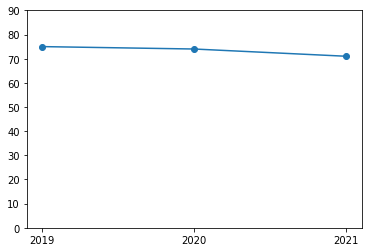

In [112]:
x=['2019','2020','2021']
y=[75,74,71]
plt.plot(x,y,marker="o")
plt.ylim(bottom=0)
plt.ylim(top=90)

plt.show()

Vi ser at forelesning er omtrent like ofte nevnt i 2021 som i 2019. Nedgang på 4 prosent.

### Hypotese 2: Økende bruk av gruppeaktiviteter.

In [113]:
print(len(dfHvl2019[dfHvl2019['TxtCln'].str.contains("gruppe") == True])/len(dfHvl2019)*100, "% in 2019")
print(len(dfHvl2020[dfHvl2020['TxtCln'].str.contains("gruppe") == True])/len(dfHvl2020)*100, "% in 2020")
print(len(dfHvl2021[dfHvl2021['TxtCln'].str.contains("gruppe") == True])/len(dfHvl2021)*100, "% in 2021")

64.65448768864178 % in 2019
63.17626527050611 % in 2020
63.1993006993007 % in 2021


Hypotesen avvist.

### Hypotese 3: Det har blitt flere diskusjoner i undervisningen.

In [114]:
print(len(dfHvl2019[dfHvl2019['TxtCln'].str.contains("disku|drøft") == True])/len(dfHvl2019)*100, "% in 2019")
print(len(dfHvl2020[dfHvl2020['TxtCln'].str.contains("disku|drøft") == True])/len(dfHvl2019)*100, "% in 2020")
print(len(dfHvl2021[dfHvl2021['TxtCln'].str.contains("disku|drøft") == True])/len(dfHvl2019)*100, "% in 2021")

20.49245432883241 % in 2019
18.427323272438443 % in 2020
20.254169976171564 % in 2021


Hypotesen avvist.

# Vurderingsformer

In [40]:
df = pd.read_excel(r'/Users/Honza/Downloads/undervisning_uis.xlsx')
df = df[df['INFOTYPEKODE']=='VURDERING'] # velge vurderdinger
df = df.reset_index(drop=True)

In [42]:
len(df)

2567

In [55]:
VfomerSeries = df["INFOTEKST"]
VfomerSeries = VfomerSeries[VfomerSeries.apply(lambda x: isinstance(x, str))] # bli kvitt alle felt uten en verdi
len(VfomerSeries) 

2530

Det er 37 råd uten en verdi i UiS datasettet.

In [62]:
VfomerSeries = VfomerSeries.apply(lambda x: re.compile(r'<[^>]+>').sub('', x)) # fjerne HTML
VfomerSeries = VfomerSeries.apply(lambda x: x.lower()) # lower case

In [71]:
common_subst = FinnMestBrukteSubst(VfomerSeries)

## 300 mest brukte substantiver - UiS

Siden du ville gå enda mer i dybden så har jeg valgt å se på top 300 substantiver basert på hvor mange ganger et ord dukker opp i samlingen av alle tekster. Dvs. at dersom et emne nevner et ord flere ganger så teller vi hver av dem.

In [72]:
common_subst

[('eksamen', 2398),
 ('emnet', 1294),
 ('studenten', 1220),
 ('ord', 937),
 ('karakter', 922),
 ('praksis', 702),
 ('oppgaven', 630),
 ('oppgave', 434),
 ('studier', 430),
 ('omfang', 400),
 ('forsøk', 372),
 ('bachelor-', 366),
 ('studenter', 362),
 ('kandidat', 355),
 ('masteroppgaven', 318),
 ('studentene', 315),
 ('karakteren', 281),
 ('forskrift', 266),
 ('krav', 259),
 ('mappen', 246),
 ('uker', 233),
 ('presentasjon', 230),
 ('vurdering', 229),
 ('søknad', 222),
 ('henhold', 211),
 ('bestått/ikke', 200),
 ('kull', 194),
 ('studiene', 191),
 ('pensum', 183),
 ('hjemmeeksamen', 175),
 ('kandidaten', 164),
 ('student', 164),
 ('tema', 161),
 ('oppgaver', 158),
 ('undervisning', 154),
 ('innholdsfortegnelse', 153),
 ('tilfeller', 152),
 ('universitetet', 148),
 ('innlevering', 147),
 ('veiledning', 143),
 ('emner', 143),
 ('konsert', 142),
 ('semester', 142),
 ('besvarelse', 141),
 ('etikk', 140),
 ('angitt', 139),
 ('deler', 136),
 ('frist', 135),
 ('adgang', 133),
 ('form', 132),


## HVL

In [78]:
df = pd.read_excel(r'/Users/Honza/Downloads/undervisning_hvl.xlsx')
df = df[df['INFOTYPEKODE']=='EBVURD'] # velge vurderdinger
df = df.reset_index(drop=True)
len(df)

3589

In [79]:
VfomerSeries = df["INFOTEKST"]
VfomerSeries = VfomerSeries[VfomerSeries.apply(lambda x: isinstance(x, str))] # bli kvitt alle felt uten en verdi
len(VfomerSeries)

3561

Det var 28 råd uten en verdi.

In [80]:
VfomerSeries = VfomerSeries.apply(lambda x: re.compile(r'<[^>]+>').sub('', x)) # fjerne HTML
VfomerSeries = VfomerSeries.apply(lambda x: x.lower()) # lower case
common_subst = FinnMestBrukteSubst(VfomerSeries)

## 300 mest brukte substantiver - HVL

In [81]:
common_subst

[('eksamen', 3954),
 ('a-f', 1817),
 ('f', 1675),
 ('karakter', 1356),
 ('studenten', 1228),
 ('tilsvarer', 1211),
 ('praksis', 960),
 ('karakterskala', 899),
 ('skoleeksamen', 861),
 ('timer', 844),
 ('a', 651),
 ('deler', 631),
 ('emnet', 594),
 ('ord', 576),
 ('studentweb', 515),
 ('oppgave', 477),
 ('vurdering', 415),
 ('e', 395),
 ('hjemmeeksamen', 389),
 ('karakterer', 380),
 ('karakteren', 362),
 ('oppgaven', 342),
 ('studentene', 314),
 ('omfang', 308),
 ('krav', 298),
 ('deleksamen', 297),
 ('studentweb.karakterskala', 292),
 ('form', 255),
 ('delene', 252),
 ('innlevering', 248),
 ('praksisperioden', 248),
 ('presentasjon', 237),
 ('bacheloroppgaven', 234),
 ('studenter', 232),
 ('retningslinjer', 222),
 ('vurderingen', 222),
 ('semesteroppgave', 219),
 ('bestått/ikke', 219),
 ('dager', 218),
 ('eksamenssystem', 203),
 ('gruppe', 201),
 ('sider', 196),
 ('gruppen', 195),
 ('student', 179),
 ('tvil', 167),
 ('praksisperiode', 162),
 ('delen', 157),
 ('besvarelse', 156),
 ('uke